In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [150]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [6]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
762,33,male,27.10,1,yes,southwest,19040.87600
190,61,male,31.57,0,no,southeast,12557.60530
767,42,female,29.00,1,no,southwest,7050.64200
1057,45,female,31.79,0,no,southeast,17929.30337
1206,59,female,34.80,2,no,southwest,36910.60803


In [7]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


as we can see in this dataset we are having seven columns out of that 2 are (float64), and 2 are (int64) and remainig 3 are(object)

In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

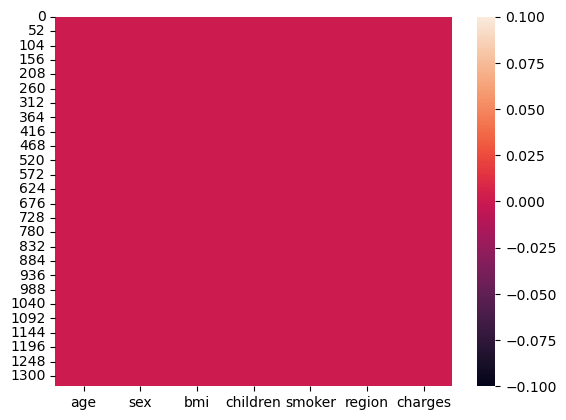

In [11]:
sns.heatmap(df.isnull())

in this dataset we do not have any missing values

In [12]:
df.shape

(1338, 7)

this dataset contains the 1338 rows and 7 columns out of that columns 1 is our target variable   

In [13]:
df.nunique().to_frame('unique values')

,unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [14]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [15]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


in the upper dataset we can see there are four columns out of that 'charges' is our target variable and in remaining columns it is showing there is not much difference between their mean value and the median(50%) value so we conclude that in this dataset we do not have the biasness but there is a difference between there '75%' percentile and there 'maximum' value so there might be outliers are present in the dataset

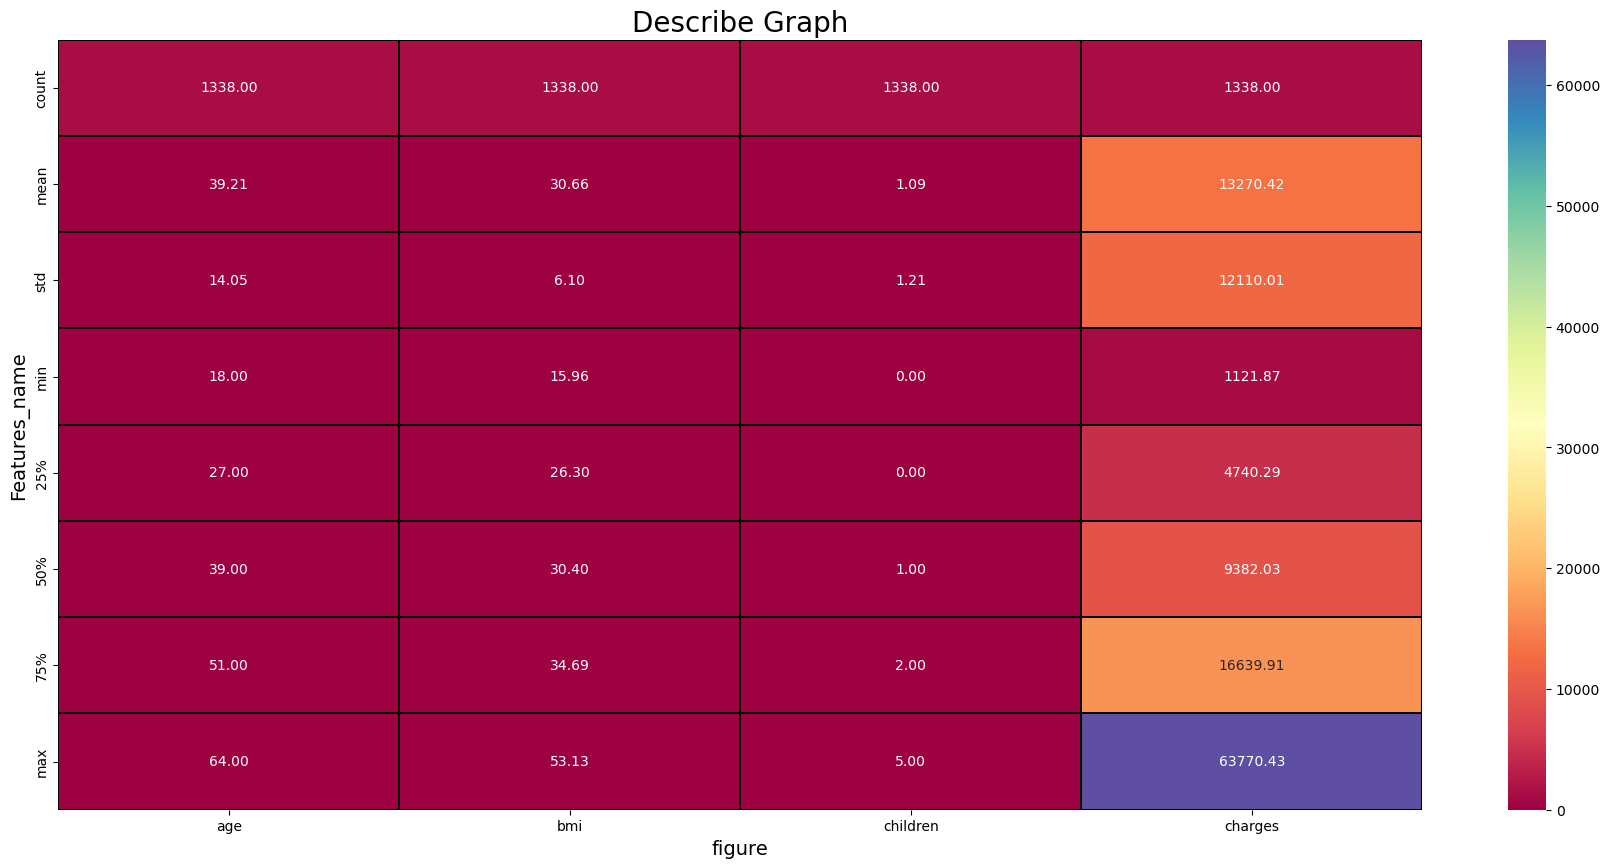

In [16]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('figure',fontsize=14)
plt.ylabel('Features_name',fontsize=14)
plt.title('Describe Graph',fontsize=20)
plt.show()

In [17]:
# seprating the columns in two side 1('numeric columns')
# 2('categorical columns')

categorical_features=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_features.append(i)
print('categorical_features:',categorical_features)
print('\n')


numerical_features=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_features.append(i)
print('numerical_features',numerical_features)
print('\n')

categorical_features: ['sex', 'smoker', 'region']


numerical_features ['age', 'bmi', 'children', 'charges']




# Data Analysis

univariate analysis

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


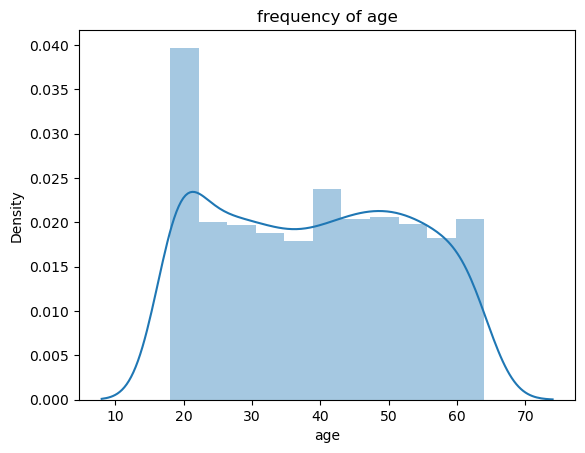

In [19]:
plt.title('frequency of age')
sns.distplot(df['age'])
plt.show()


in this 'age' distribution plot values between 18 to 20 frequency is bit high than the other values it means most of our customers are emerging Adulthood('youth')


male      676
female    662
Name: sex, dtype: int64


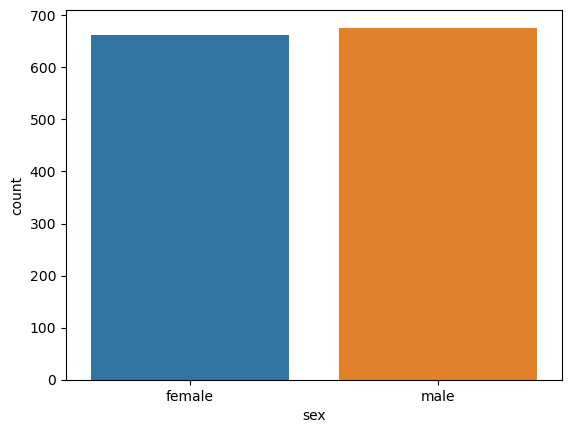

In [20]:
print(df['sex'].value_counts())
sns.countplot(x='sex',data=df)
plt.show()

there is not much difference in the sex column between 'male' and 'female' 

In [21]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


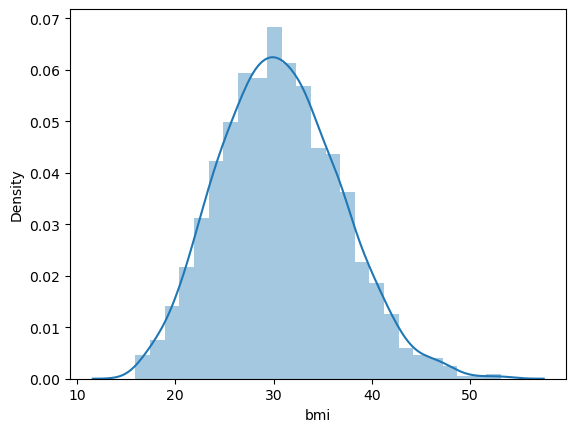

In [22]:
print(df['bmi'].value_counts())
sns.distplot(df['bmi'])
plt.show()

 it looks almost normally distributed 

<Axes: xlabel='children', ylabel='count'>

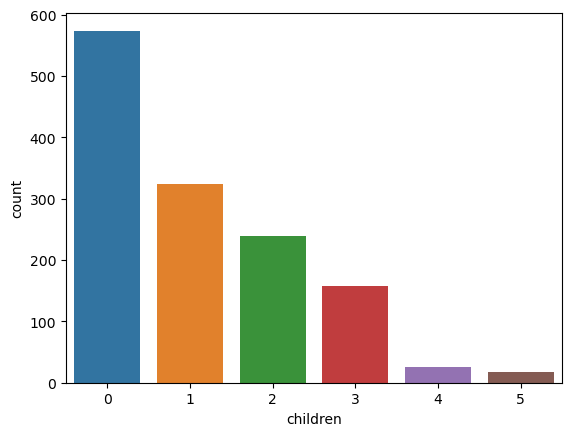

In [23]:
sns.countplot(x='children',data=df)

in the children column 0 repeated multiple times because most of our customers age is between 18 to 20 it means they are not married that,s why 0 repeated multiple times

no     1064
yes     274
Name: smoker, dtype: int64


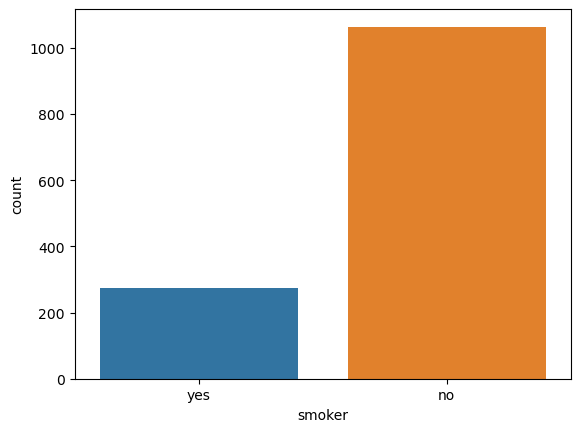

In [24]:
print(df['smoker'].value_counts())
sns.countplot(x='smoker',data=df)
plt.show()

no smokers value is high in the smoking column

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


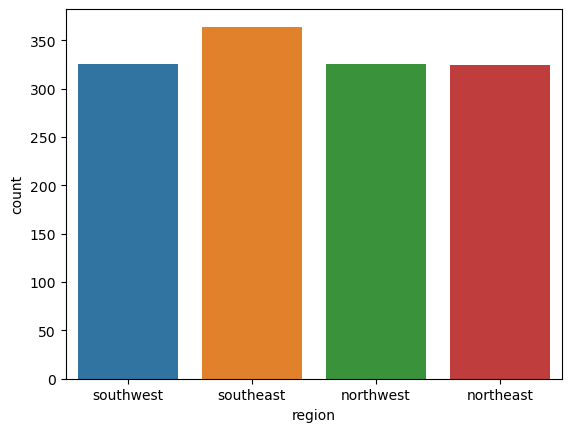

In [25]:
print(df['region'].value_counts())
sns.countplot(x='region',data=df)
plt.show()

in the region column southeast frequency is bit high rest of are almost same

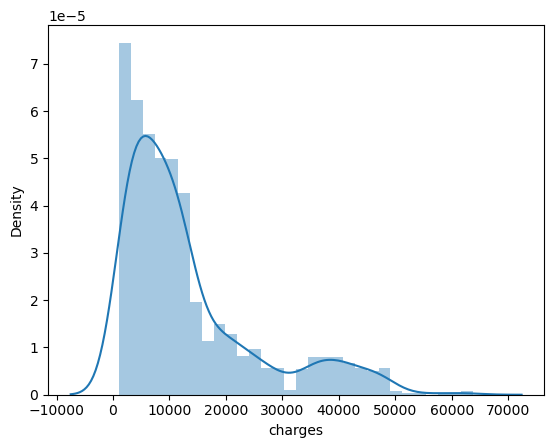

In [26]:
sns.distplot(df['charges'])
plt.show()

most of our values are lying between 2000 to 15000

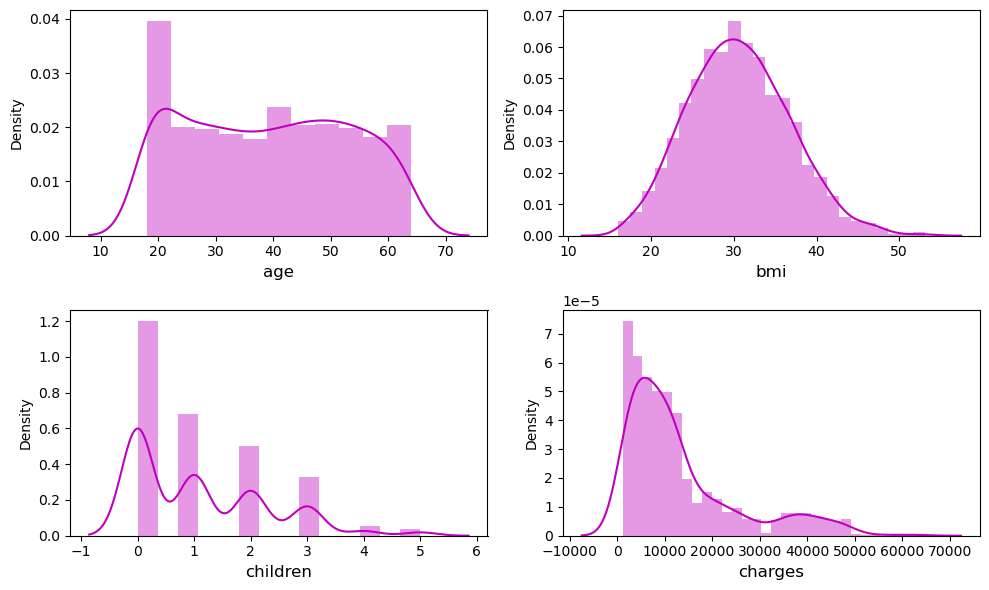

In [27]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in numerical_features:
    if plotnumber<=5:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col], color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

# Bivariate analysis

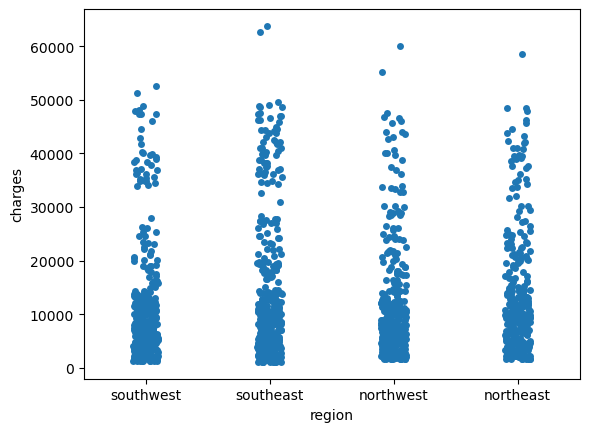

In [28]:
sns.stripplot(x='region',y='charges',data=df)
plt.show()

in the southeast region charges are bit high

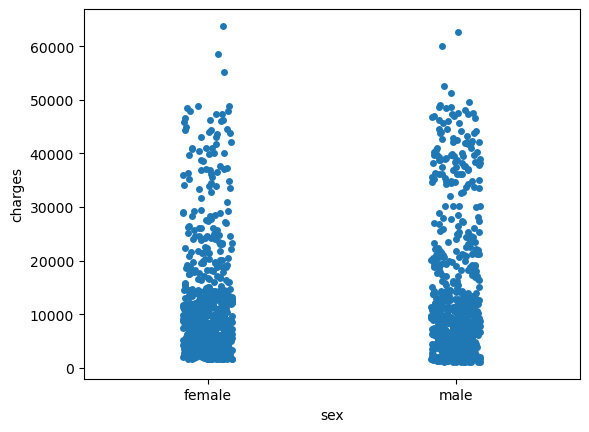

In [29]:
sns.stripplot(x='sex',y='charges',data=df)
plt.show()

charges are almost same for 'male' and 'female' in the dataset

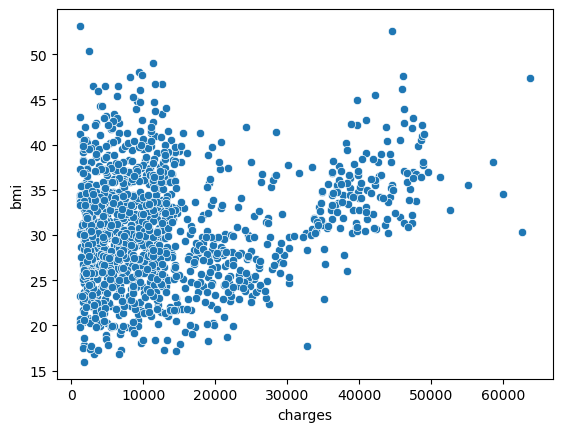

In [30]:
sns.scatterplot(x='charges',y='bmi',data=df)
plt.show()

not that much strongly corelated

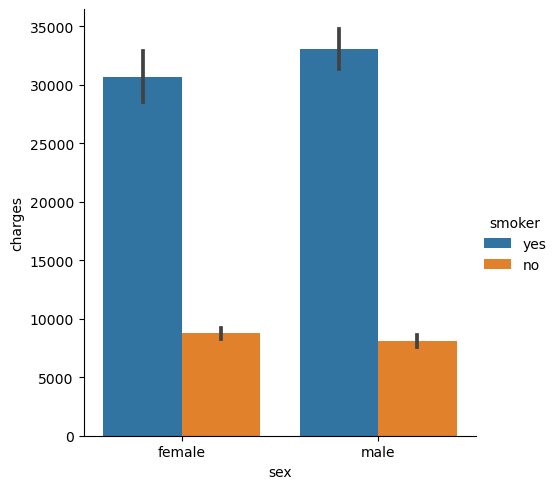

In [31]:
sns.catplot(x='sex',y='charges',data=df,hue='smoker',kind='bar')
plt.show()

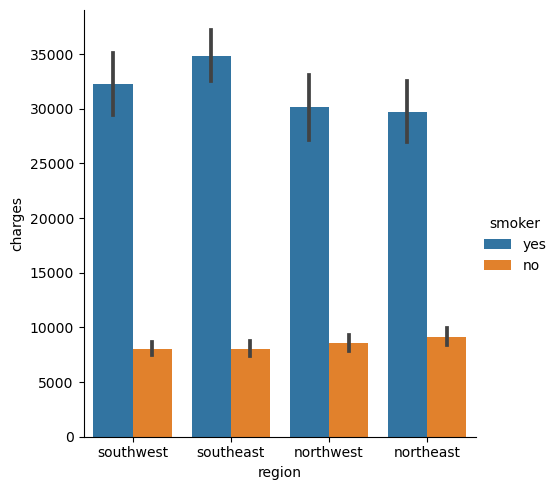

In [32]:
sns.catplot(x='region',y='charges',data=df,kind='bar',hue='smoker')
plt.show()

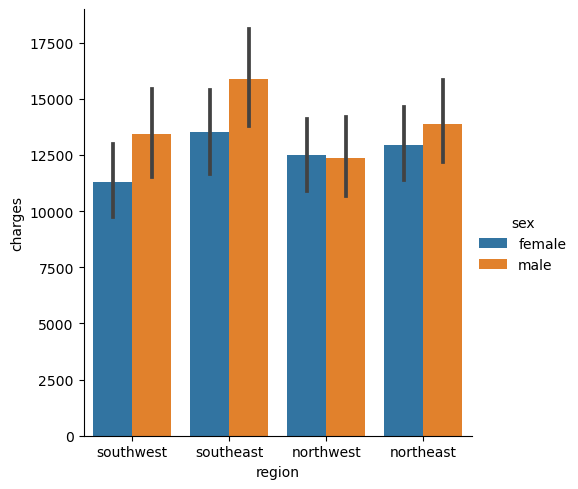

In [33]:
sns.catplot(x='region',y='charges',data=df,hue='sex',kind='bar')
plt.show()

# multivariate analysis

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


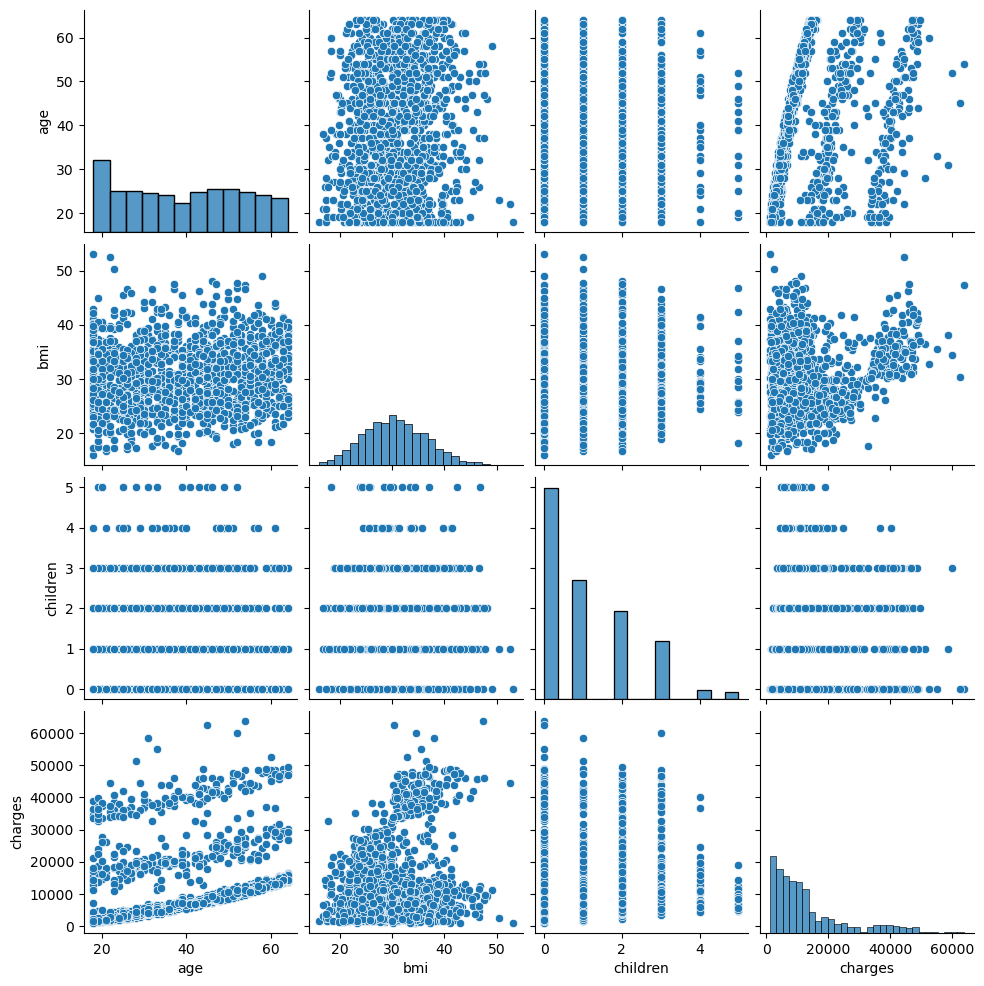

In [35]:
sns.pairplot(df)

# checking skewness

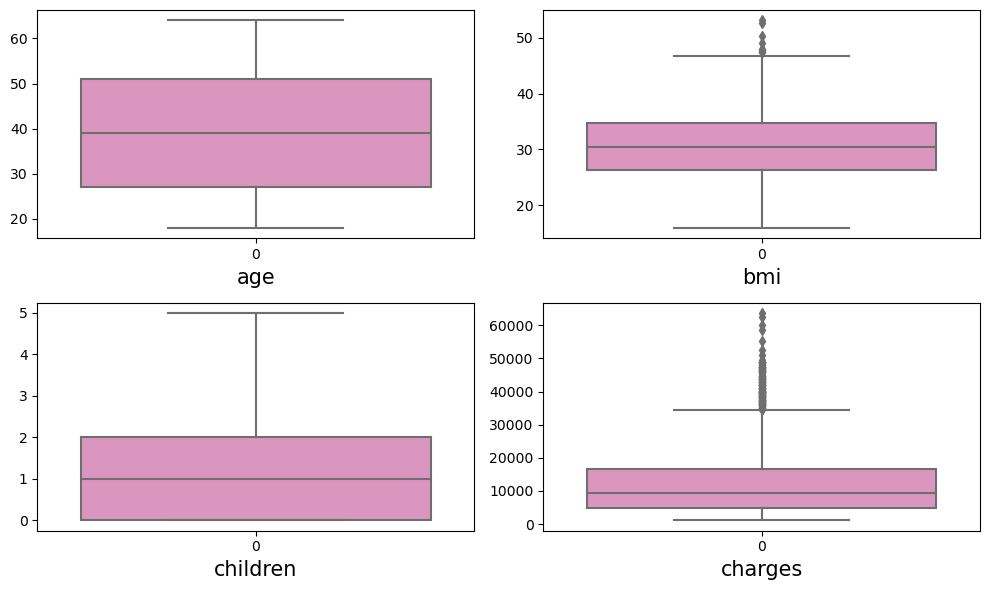

In [36]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in numerical_features:
    if plotnumber<=5:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],palette='Set2_r')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize= 10)
    plotnumber+=1
plt.tight_layout()

the 'bmi' column has some outliers and 'charges' also but charges is our target variable so we will not detect the outiers from the target column
we will remove outliers from the 'bmi' column only

In [149]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.014147
children         NaN
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

In [153]:
df['bmi']=np.sqrt(df['bmi'])


In [154]:
df.skew()

age         0.055673
bmi         0.014147
children    0.938380
charges     1.515880
dtype: float64

In [151]:
# it is consider as an categorical data because in this column we have only 6 unique value
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

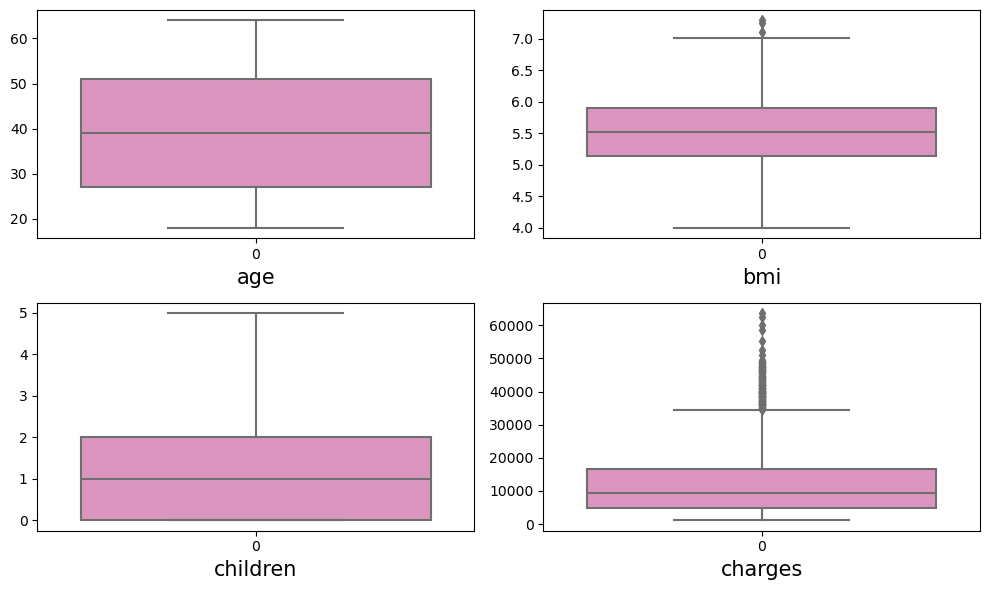

In [155]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in numerical_features:
    if plotnumber<=5:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],palette='Set2_r')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize= 10)
    plotnumber+=1
plt.tight_layout()

we have resolved the skewness problem

In [156]:
# Encoding categorical columns using labelencoder
lb=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=lb.fit_transform(df[i].values.reshape(-1,1))
        
df


,age,sex,bmi,children,smoker,region,charges
0,19,0,5.282045,0,1,3,16884.92400
1,18,1,5.811196,1,0,2,1725.55230
2,28,1,5.744563,3,0,2,4449.46200
3,33,1,4.764976,0,0,1,21984.47061
4,32,1,5.374012,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,5.565070,3,0,1,10600.54830
1334,18,0,5.649779,0,0,0,2205.98080
1335,18,0,6.070420,0,0,2,1629.83350
1336,21,0,5.079370,0,0,3,2007.94500


here we have done the labelencoding process now our all the categorical columns converted into numeric columns

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


# correlation between  independent features and dependent features  

In [44]:
df_corr=df.corr()
df_corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.112927,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046296,0.017163,0.076185,0.004588,0.057292
bmi,0.112927,0.046296,1.000000,0.012912,0.002055,0.158576,0.199380
children,0.042469,0.017163,0.012912,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.002055,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.158576,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.199380,0.067998,0.787251,-0.006208,1.000000


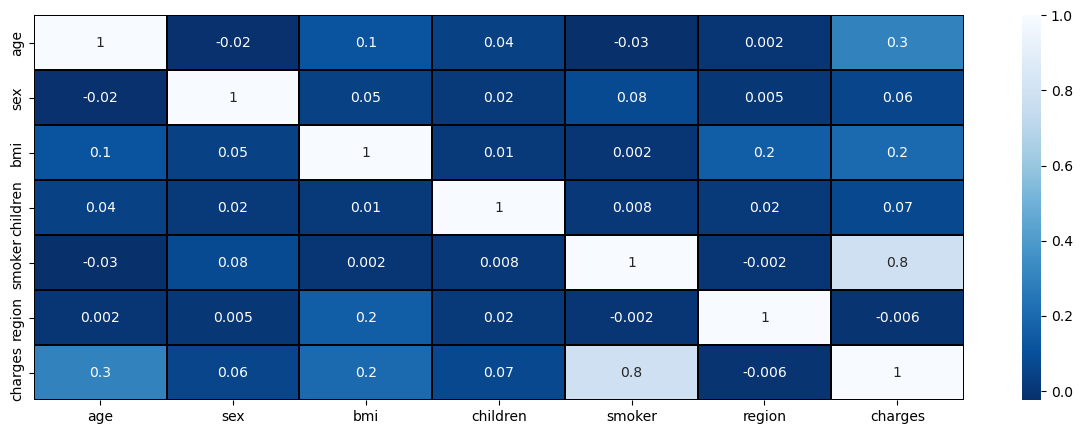

In [45]:
# visualizing the correlation matrix by using the plot
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.show()

there is not much positive correlation between the target variable and features

In [46]:
df_corr['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.199380
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

here the numbers are availabel so it is easy to understand the positive and negative correlaton  features with target variable 

# separating features and label

In [157]:
x=df.iloc[:,0:-1]
y=df['charges']

# standard scaling on independent features

In [158]:
st=StandardScaler()
x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.413147,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.546238,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.425427,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.350626,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.246406,-0.908614,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.099995,1.580926,-0.507463,-0.466915
1334,-1.509965,-1.010519,0.253578,-0.908614,-0.507463,-1.372326
1335,-1.509965,-1.010519,1.016228,-0.908614,-0.507463,0.438495
1336,-1.296362,-1.010519,-0.780610,-0.908614,-0.507463,1.343905


# checking variance inflation factor

In [159]:
vif=pd.DataFrame()
vif['features']=x.columns
vif['values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,features,values
0,age,1.016249
1,sex,1.008903
2,bmi,1.041823
3,children,1.002482
4,smoker,1.006458
5,region,1.026324


by looking variance inflation factor values we can conclude that the features do not have the issue of multicolinearity

# finding best random state for high model  performance


In [183]:
maxAccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('maximum r2 score is ',maxAccu,'on random_state',maxRS)

maximum r2 score is  0.8036991216480429 on random_state 112


In [184]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)


In [186]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print(LR)
print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training Data',r2_score(y_train,pred_train)*100)
print('mean_absolute_error',mean_absolute_error(y_test,pred_LR))
print('mean_squared_error',mean_squared_error(y_test,pred_LR))
print('Root mean squared error:-',np.sqrt(mean_squared_error(y_test,pred_LR)))

LinearRegression()
R2_score: 0.8036991216480429
R2_score on training Data 72.62576409555453
mean_absolute_error 3960.2351631378647
mean_squared_error 29950630.88178208
Root mean squared error:- 5472.716956118056


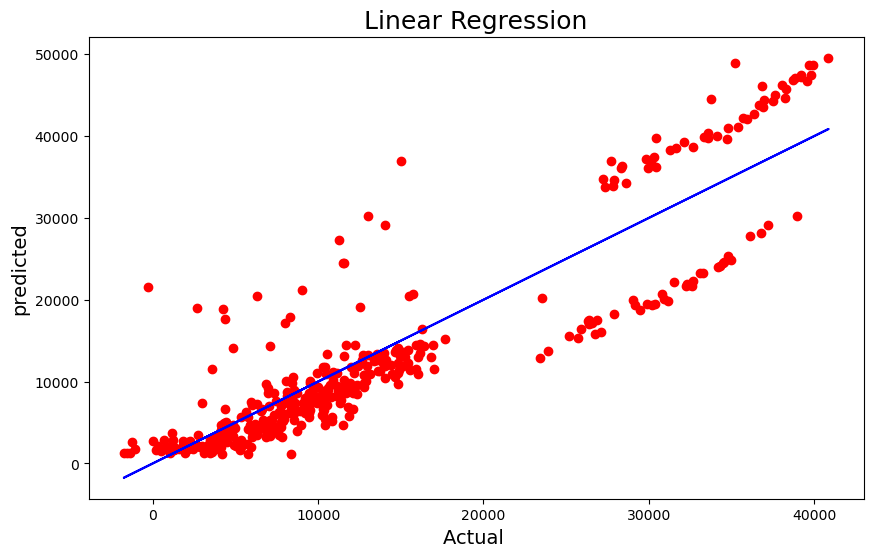

In [187]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [164]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score',r2_score(y_test,pred_RFR))
print('R2_score on training data',r2_score(pred_train,y_train)*100)
print('mean_absolute_error',mean_absolute_error(y_test,pred_RFR))
print('mean_squared_error',mean_squared_error(y_test,pred_RFR))
print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score 0.8968843435663627
R2_score on training data 96.97903081655397
mean_absolute_error 2251.066686637105
mean_squared_error 15732884.080320958
Root mean squared error 3966.469977236807


In [55]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on training data',r2_score(pred_train,y_train)*100)
print('mean_absolute_error',mean_absolute_error(y_test,pred_knn))
print('mean_squared_error',mean_squared_error(y_test,pred_knn))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_knn)))



R2_score: 0.8609628385003417
R2_score on training data 82.82864846373742
mean_absolute_error 2939.310666052239
mean_squared_error 21213612.17477951
root mean squared error 4605.823723806579


In [56]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training data',r2_score(pred_train,y_train)*100)
print('mean_absolute_error',mean_absolute_error(y_test,pred_knn))
print('mean_squared_error',mean_squared_error(y_test,pred_knn))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score: 0.9127685379168653
R2_score on training data 87.2488918043085
mean_absolute_error 2939.310666052239
mean_squared_error 21213612.17477951
root mean squared error 4605.823723806579


In [57]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score',r2_score(y_test,pred_lasso))
print('R2_score on training Data:-', r2_score(y_train,pred_train)*100)
print('mean absolute error',mean_absolute_error(y_test,pred_lasso))
print('mean squared error',mean_squared_error(y_test,pred_lasso))
print('Root mean squared error:-',np.sqrt(mean_absolute_error(y_test,pred_lasso)))

R2_score 0.8037080356134991
R2_score on training Data:- 72.62575940264367
mean absolute error 3960.046949969369
mean squared error 29949270.832396094
Root mean squared error:- 62.92890393109806


In [58]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_ridge=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:-',r2_score(y_test,pred_ridge))
print('R2_score on training Data:-',r2_score(y_train,pred_train)*100)
print('mean absolute error',mean_absolute_error(y_test,pred_ridge))
print('mean squared error',mean_squared_error(y_test,pred_ridge))
print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2_score:- 0.8037001078386743
R2_score on training Data:- 72.62567159183774
mean absolute error 3961.819318079383
mean squared error 29950480.41362407
Root mean squared error 5472.703208984028


In [59]:
elst=ElasticNet()
elst.fit(x_train,y_train)
pred_elst=elst.predict(x_test)
pred_train=elst.predict(x_train)
print('R2_score:-',r2_score(y_test,pred_elst))
print('R2_score on training Data:-',r2_score(y_train,pred_train)*100)
print('mean absolute error',mean_absolute_error(y_test,pred_elst))
print('mean squared error',mean_squared_error(y_test,pred_elst))
print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred_elst)))


R2_score:- 0.7079068658996212
R2_score on training Data:- 63.982194615269925
mean absolute error 5073.85862286957
mean squared error 44566146.19348748
Root mean squared error 6675.788057861594


In [60]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:-',r2_score(y_test,pred_DTR))
print('R2_score on training data:-',r2_score(y_train,pred_train)*100)
print('mean absolute error',mean_absolute_error(y_test,pred_DTR))
print('mean squared error',mean_squared_error(y_test,pred_DTR))
print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2_score:- 0.8043090145363383
R2_score on training data:- 99.86401505730052
mean absolute error 2318.0800076343285
mean squared error 29857576.39864315
Root mean squared error 5464.208670854651


In [61]:
svr=SVR()
svr.fit(x_train,y_train)
pred_SVR=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2_score:-',r2_score(y_test,pred_SVR))
print('R2_score on training Data:-',r2_score(y_train,pred_train)*100)
print('mean absolute error',mean_absolute_error(y_test,pred_SVR))
print('mean squared error',mean_squared_error(y_test,pred_SVR))
print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred_SVR)))

R2_score:- -0.07313418987753773
R2_score on training Data:- -9.198450210002406
mean absolute error 8523.586063798955
mean squared error 163733582.23092198
Root mean squared error 12795.842380668886


In [62]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_ETR=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2_score',r2_score(y_test,pred_ETR))
print('R2_score on training Data',r2_score(y_train,pred_train)*100)
print('mean absolute error',mean_absolute_error(y_test,pred_ETR))
print('mean squared error',mean_squared_error(y_test,pred_ETR))
print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred_ETR)))

R2_score 0.8798793867182155
R2_score on training Data 99.86401505730052
mean absolute error 2342.5750410670407
mean squared error 18327417.482287325
Root mean squared error 4281.053314581275


# cross validation score

In [63]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is-',(r2_score(y_test,pred_LR)-score.mean())*100)

[0.76119968 0.71066359 0.77745822 0.73386845 0.75567547]
0.7477730807426441
Difference between R2 score and cross validation score is- 5.592604090539877


In [64]:
score1=cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print('Difference between R2 score and cross validation score is-',(r2_score(y_test,pred_RFR)-score.mean())*100)

[0.85448961 0.77811217 0.86882314 0.82833846 0.85181347]
0.8363153710784307
Difference between R2 score and cross validation score is- 14.727361395817029


In [65]:
score2= cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is-',(r2_score(y_test,pred_knn)-score2.mean())*100)



[0.82030954 0.75627773 0.83850781 0.80660448 0.81421226]
0.8071823659001606
Difference between R2 score and cross validation score is- 5.378047260018115


In [66]:
score3=cross_val_score(GBR,x,y)
print(score3)
print(score3.mean())
print('Difference between R2 score and cross validation score',(r2_score(y_test,pred_GBR)-score3.mean())*100)

[0.8751199  0.79199734 0.89425947 0.84899908 0.85973012]
0.854021182622084
Difference between R2 score and cross validation score 5.874735529478126


In [67]:
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print('difference between R2 score and cross validation score is-',(r2_score(y_test,pred_lasso)-score4.mean())*100)

[0.76120777 0.71069545 0.77743998 0.73386576 0.75568123]
0.7477780386801676
difference between R2 score and cross validation score is- 5.592999693333156


In [68]:
score5=cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score',(r2_score(y_test,pred_ridge)-score5.mean())*100)

[0.7612095  0.71076644 0.77733933 0.73392379 0.75565011]
0.7477778352646498
Difference between R2 score and cross validation score 5.592227257402449


In [69]:
score6=cross_val_score(dtr,x,y)
print(score6)
print(score6.mean())
print('difference between R2 score and cross validation score is-',(r2_score(y_test,pred_DTR)-score.mean())*100)

[0.75430468 0.68837784 0.7159862  0.70953095 0.67716684]
0.7090733020737694
difference between R2 score and cross validation score is- 5.653593379369415


In [70]:
score7=cross_val_score(svr,x,y)
print(score7)
print(score7.mean())
print('difference between R2 score and cross validation score is-',(r2_score(y_test,pred_SVR)- score7.mean())*100)



[-0.10984676 -0.10771051 -0.07630681 -0.10149218 -0.10232936]
-0.09953712281905211
difference between R2 score and cross validation score is- 2.6402932941514385


In [71]:
score8=cross_val_score(etr,x,y)
print(score8)
print(score8.mean())
print('difference between R2 score and cross validation is-',(r2_score(y_test,pred_ETR)- score8.mean())*100)

[0.8332935  0.74473601 0.85512484 0.81443597 0.84141191]
0.817800447059718
difference between R2 score and cross validation is- 6.207893965849753


from the difference of both R2 score and cross validation score computed on R2 score we can conclude that GradientBoostingRegressor regression as our best fitting and best performing model

In [72]:
param={'criterion':['friedman_mse'],'max_depth':[3,5,6,2,8],'n_estimators':[100,50,80,150],'validation_fraction':[0.1,0.2,0.5,0.7]}
gscv=GridSearchCV(GradientBoostingRegressor(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse'],
                         'max_depth': [3, 5, 6, 2, 8],
                         'n_estimators': [100, 50, 80, 150],
                         'validation_fraction': [0.1, 0.2, 0.5, 0.7]})

# GridSearchCV best parameters

In [73]:
gscv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'n_estimators': 50,
 'validation_fraction': 0.2}

In [88]:
model=GradientBoostingRegressor(criterion='friedman_mse',max_depth=1,n_estimators=50,validation_fraction=0.5)

In [188]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('R2_score-',r2_score(y_test,pred))

R2_score- 0.7782880984663969


In [113]:
Final_model=GradientBoostingRegressor(criterion='friedman_mse',max_depth=3,n_estimators=100,validation_fraction=0.2)

In [195]:
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
print('R2_score-',r2_score(y_test,pred))


R2_score- 0.9125622704848305


In [196]:
import pickle
filename='TeslaStock.pkl'
pickle.dump(Final_model,open(filename,'wb'))
# model saved

In [199]:
load_model=pickle.load(open('TeslaStock.pkl','rb'))
pred=load_model.score(x_test,y_test)
print(pred*100)

91.25622704848305


In [202]:
output=pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=['predicted','original'])
output

,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
predicted,11694.541176,8721.43119,34358.227794,24441.449124,24643.067288,7920.672784,8845.960611,20288.149029,5921.741887,3751.651652,...,7818.354757,40125.408977,13833.843247,8578.36712,11399.587305,6706.961295,6295.285247,9987.282265,7565.32999,3838.054962
original,11090.717800,8017.06115,34617.840650,24535.698550,23967.383050,8059.679100,8252.284300,20745.989100,5253.524000,1719.436300,...,7046.722200,36307.798300,13415.038100,6402.29135,9866.304850,5972.378000,5245.226900,6948.700800,2680.94930,1969.614000
